<a href="https://www.kaggle.com/code/yaramahrous/hr-analytics-employee-attrition-performance?scriptVersionId=199752119" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #800080;
  font-size: 30px;
  text-align: left;
">
  📚 Import Libraries
</div>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #b22222;
  font-size: 30px;
  text-align: left;
">
  ⚠️ Remove Warnings
</div>


In [ ]:
import warnings
warnings.filterwarnings('ignore')

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #4682b4; /* Changed color */
  font-size: 30px;
  text-align: left;
">
  📥 Load Data
</div>


In [ ]:
df =pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
#display all columns and rows
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color:#228b22;
  font-size: 30px;
  text-align: left;
">
  🔍 Data Exploration
</div>


In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100
null_summary = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percentages
})

null_summary = null_summary.style.format({
    'Null Count': '{:.0f}',
    'Null Percentage': '{:.2f}%'
}).background_gradient(cmap='coolwarm')

null_summary

- there is no null values

In [ ]:
df.duplicated().sum()

- no duplicates

In [ ]:
df.describe()

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 8px;
  font-family: 'Arial', sans-serif;
  color: #333;
  line-height: 1.6;
  font-size: 18p
">
  <p><strong>Age</strong>: The average age of employees is <strong>36 years</strong>, with a minimum of 18 and a maxiof </p>
  <p>The average <strong>daily rate</strong> is around <strong>802</strong>, with a wide range from 1o 1.</p>
  <p><strong>DistanceFromHome</strong>: The average distance from home is about <strong>9.2 miles</strong>, with some employees living as close as 1 mile and others as far as 29 miles from theirkpe.</p>
  <p>The <strong>average monthly income</strong> is approximately <strong>/strong>.</p>
  <p>On average, employees have around <strong>11.3 years</strong> of <strong>total working experience</strong>, with some having just started and others having up to 40 years of experience.</p>
  <p><strong>YearsAtCompany</strong>: Employees have been with the company for an average of <strong>7 years</strong>.</p>
</div>


<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #4682b4; /* Changed color */
  font-size: 30px;
  text-align: left;
">
  📥 numerical columns
</div>


In [ ]:
def create_box_hist_plot(df, column):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                        vertical_spacing=0.1,
                        subplot_titles=(f'Distribution of {column}', 'Histogram'))

    # Box plot
    fig.add_trace(go.Box(x=df[df['Attrition']=='Yes'][column], name='Attrition',
                         marker_color='red'), row=1, col=1)
    fig.add_trace(go.Box(x=df[df['Attrition']=='No'][column], name='No Attrition',
                         marker_color='blue'), row=1, col=1)

    # Histogram
    fig.add_trace(go.Histogram(x=df[df['Attrition']=='Yes'][column], name='Attrition',
                               marker_color='red', opacity=0.7), row=2, col=1)
    fig.add_trace(go.Histogram(x=df[df['Attrition']=='No'][column], name='No Attrition',
                               marker_color='blue', opacity=0.7), row=2, col=1)

    fig.update_layout(height=600, width=800, title_text=f'{column} vs Attrition')
    fig.update_xaxes(title_text=column, row=2, col=1)
    fig.update_yaxes(title_text='Count', row=2, col=1)

    fig.show()

In [ ]:
create_box_hist_plot(df, 'Age')

-  The ages of employees who have left the company and those who haven’t are quite similar
-  Most employees, whether they’ve left or stayed, are between 30 and 40 years old. But there are a few more younger employees among those who have left.
  

In [ ]:
create_box_hist_plot(df, 'MonthlyIncome')

- Employees who have left the company generally earn less money compared to those who have stayed.
-  Employees who have stayed have a wider range of incomes

In [ ]:
create_box_hist_plot(df, 'DistanceFromHome')

- Employees who have left the company tend to live a bit further away from their workplace compared to those who have stayed.
- Most employees live close to work. However, employees who live further away are more likely to have left the company

In [ ]:
create_box_hist_plot(df, 'YearsAtCompany')

- The visualization shows that employees who leave tend to have fewer years at the company.
- This suggests that newer employees are at higher risk of attrition.

In [ ]:
create_box_hist_plot(df, 'YearsInCurrentRole')

- Employees who stay tend to have more years in their current role.
- This indicates that employees who have been in their roles longer are more likely to stay

In [ ]:
create_box_hist_plot(df, 'YearsWithCurrManager')

- Employees who stay have been with their current manager longer.
- Manager relationships are important: Longer relationships with current managers correlate with lower attrition rates.

In [ ]:
create_box_hist_plot(df, 'StockOptionLevel')

*   The tendency of employees to leave the organization is much more when the stock availing options are limited as they have a freedom to leave the organization at will.

*   People with higher stock availing options are reluctant to miss out on the significant financial gains these stocks can offer by holding onto them for a few years.

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #4682b4; /* Changed color */
  font-size: 30px;
  text-align: left;
">
  📥 Categorical Columns
</div>


In [ ]:

def create_pie_bar_plot(df, column, attrition_col='Attrition'):
    # Calculate the counts for pie charts
    pie_data = df.groupby([attrition_col, column]).size().unstack(fill_value=0)

    # Calculate totals for stacked bar plot
    bar_data = df.groupby([column, attrition_col]).size().unstack(fill_value=0)

    # Calculate percentages
    bar_percentages = bar_data.div(bar_data.sum(axis=1), axis=0) * 100

    fig = make_subplots(rows=1, cols=2,
                        specs=[[{'type': 'domain'}, {'type': 'xy'}]],
                        subplot_titles=(f'Distribution of {column}', f'{column} Count by {attrition_col}'))

    pie_colors = ['#1f77b4', '#ff7f0e']
    bar_colors = {'Yes': '#d62728', 'No': '#2ca02c'}

    for attrition_status in df[attrition_col].unique():
        pie_values = pie_data.loc[attrition_status]
        fig.add_trace(go.Pie(labels=pie_values.index, values=pie_values.values,
                             name=f'{attrition_col} {attrition_status}',
                             marker=dict(colors=pie_colors)),
                      row=1, col=1)

    for attrition_status in df[attrition_col].unique():
        counts = bar_data[attrition_status]
        percentages = bar_percentages[attrition_status]
        text = [f'{count} ({percentage:.1f}%)' for count, percentage in zip(counts, percentages)]

        fig.add_trace(go.Bar(
            x=bar_data.index,
            y=bar_data[attrition_status],
            name=f'{attrition_col} {attrition_status}',
            marker_color=bar_colors[attrition_status],
            text=text,
            textposition='outside'
        ), row=1, col=2)


    fig.update_layout(height=600, width=1100, title_text=f'{column} Distribution and Count by {attrition_col}')
    fig.update_xaxes(title_text=column, row=1, col=2)
    fig.update_yaxes(title_text='Count', row=1, col=2)
    fig.update_layout(barmode='stack')

    fig.show()

create_pie_bar_plot(df, 'Gender')




*   The percentage of males is higher than the percentage of females, and as a result, the attrition rate among males is also higher.



In [ ]:
create_pie_bar_plot(df, 'BusinessTravel')


* The percentage of employees who travel rarely is the highest at 71.9%.
* The attrition rate among employees who travel frequently is the highest. This may be due to various factors, including the challenges associated with frequent travel.



In [ ]:
create_pie_bar_plot(df, 'Department')



*   While most emplyees in the company work in R&D department but the highest attrition rate is in Sales department. This may be due to high turnover nature of the sales department



In [ ]:
create_pie_bar_plot(df, 'EducationField')




*   Altough the employees with education field of HR are the least precentage in the company but they have the highest rate of attrition



In [ ]:
create_pie_bar_plot(df, 'JobRole')




*   As the the sales department has the highest attrition rate it's naturally that the sales represntative job role also has the highest attrition rate.



In [ ]:
create_pie_bar_plot(df, 'MaritalStatus')


* The majority of employees are married.
* The highest attrition rate is observed among single employees, which could be attributed to the potentially fewer personal responsibilities they have, leading to a greater likelihood of seeking new opportunities.

In [ ]:
create_pie_bar_plot(df, 'OverTime')




*   The Precentage of the employees which work overtime have the highest rate of attrition perhaps that's beacause of the increasing stress level.



# See Non-linear Relations

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
sns.pairplot(df[numeric_columns],
             markers="o",
             kind='reg',
             diag_kind="kde",
             plot_kws={'line_kws': {'color': '#ffa07a'},
                       'scatter_kws': {'alpha': 0.7,
                                       'color': '#20b2aa'}},
             diag_kws={'color': '#6495ed'},
             corner=True)

plt.show()

In [ ]:
import dcor
df_numerical = df.select_dtypes(include=['number'])

distance_corr = pd.DataFrame(index=df_numerical.columns, columns=df_numerical.columns)

for col1 in df_numerical.columns:
    for col2 in df_numerical.columns:
        if col1 == col2:
            distance_corr.loc[col1, col2] = 1.0
        else:
            distance_corr.loc[col1, col2] = dcor.distance_correlation(df_numerical[col1], df_numerical[col2])

distance_corr = distance_corr.apply(pd.to_numeric)

In [ ]:
strong_pairs = []
for col1 in distance_corr.columns:
    for col2 in distance_corr.columns:
        if col1 != col2 and distance_corr.loc[col1, col2] >= 0.5:
            strong_pairs.append((col1, col2))

for (col1, col2) in strong_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_numerical[col1], y=df_numerical[col2])
    plt.title(f'Strong Distance Correlation between {col1} and {col2}')
plt.show()

There is no non-Linear relations.

lets see corr with target

In [ ]:
mapping_dict = {'Yes': 1, 'No': 0}
df['Attrition'] = df['Attrition'].map(mapping_dict)


In [ ]:
df['Attrition'].value_counts()

In [ ]:
df_corr = df.select_dtypes(include=['number']).corr()

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [ ]:
threshold = 0.2
def highlight_attrition_corr(s):
    is_low = abs(s) < threshold
    return ['background-color: yellow' if val and col == 'Attrition' else '' for val, col in zip(is_low, s.index)]
styled_df_corr = df_corr.style.apply(highlight_attrition_corr, axis=0)
styled_df_corr

lets drop columns with low correlations with target

In [ ]:
columns_to_drop = ["EmployeeCount","StandardHours","PerformanceRating"]
df= df.drop(columns=columns_to_drop)


In [ ]:
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

# Check for outliers

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
rows, cols = 8 , 3
custom_palette = sns.color_palette("husl", n_colors=9)

fig, axes = plt.subplots(rows, cols, figsize=(50, 60))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        sns.boxplot(x=df[col], ax=axes[i], color=custom_palette[i % len(custom_palette)])
        axes[i].set_title(col, fontsize=24)

plt.tight_layout()
plt.show()

- Outliers have no great effect on the result

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #800080;
  font-size: 30px;
  text-align: left;
">
  📚  Dealing multicollinearity using the Variance Inflation Factor (VIF)
</div>


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df_2 = df.select_dtypes(include=['number'])
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Calculate VIF for all features
vif_before = calculate_vif(df_2)

# Apply conditional formatting
def highlight_high_vif(val):
    color = 'red' if val > 10 else ''
    return f'background-color: {color}'

# Display the VIF with styling
vif_styled = vif_before.style.applymap(highlight_high_vif, subset=['VIF'])
vif_styled

In [ ]:
high_vif_features = vif_before[vif_before['VIF'] > 10]['Feature']
while not high_vif_features.empty:
    feature_to_drop = high_vif_features.iloc[0]
    df_2= df_2.drop(columns=[feature_to_drop])
    high_vif_features = calculate_vif(df_2)[calculate_vif(df_2)['VIF'] > 10]['Feature']

vif_after = calculate_vif(df_2)
print("VIF after removing features:")
vif_after


we will drop  `PercentSalaryHike`,`WorkLifeBalance`,`YearsAtCompany`

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #4682b4; /* Changed color */
  font-size: 30px;
  text-align: left;
">
  📥Feature Engineering
</div>


In [ ]:
#df['TotalYears'] = df['YearsAtCompany'] + df['YearsInCurrentRole'] + df['YearsSinceLastPromotion'] + df['YearsWithCurrManager']

In [ ]:
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
df['HighIncome'] = (df['MonthlyIncome'] > 8000).astype(int)

In [ ]:

bin_edges = [0,5,10,15,20,30]
bin_labels = ['0-5 kms', '6-10 kms', '11-15 kms','16-20 kms', '20+ kms']
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

In [ ]:
df['IncomeToRateRatio'] = df['MonthlyIncome'] / df['MonthlyRate']

In [ ]:
df['TotalSatisfaction_mean'] = (df['RelationshipSatisfaction']  + df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['JobInvolvement'] + df['WorkLifeBalance'])/5

In [ ]:
df['JobEnvSatisfactionInteraction'] = df['JobSatisfaction'] * df['EnvironmentSatisfaction']

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #800080;
  font-size: 30px;
  text-align: left;
">
  📚Encoding Part
</div>


In [ ]:
cols = ["Over18"]
df.drop(columns=cols, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
encoder = OneHotEncoder()

In [ ]:
df["Gender"] = df["Gender"].replace({"Female":0 ,"Male":1})

In [ ]:
df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime'], drop_first=True)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df[['AgeGroup', 'DistanceGroup']] = ordinal_encoder.fit_transform(df[['AgeGroup', 'DistanceGroup']])


In [ ]:
# check
df.info()

# drop

In [ ]:
cols_to_drop = ['PercentSalaryHike','WorkLifeBalance','YearsAtCompany']
df = df.drop(columns=cols_to_drop)

<div style="
  background-color: #f9f9f9;
  padding: 20px;
  border-left: 6px solid #4caf50;
  border-radius: 10px;
  font-family: 'Arial Black', sans-serif;
  color: #800080;
  font-size: 30px;
  text-align: left;
">
   📚Modeling Part
</div>


Based on imbalanced data i will do resampling to fix it

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [ ]:
y = df['Attrition']
X = df.drop(columns=['Attrition'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Doing oversampling beacause data imbalanced

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
df_before = pd.DataFrame({'Attrition': y_train, 'SMOTE': 'Before SMOTE'})

df_after = pd.DataFrame({'Attrition': y_train_resampled, 'SMOTE': 'After SMOTE'})

df_combined = pd.concat([df_before, df_after])
plt.figure(figsize=(12, 6))
sns.countplot(x='Attrition', hue='SMOTE', data=df_combined)
plt.title('Attrition Distribution Before and After SMOTE')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.legend(title='SMOTE')
plt.show()


- without scaling

In [ ]:
svm = SVC()
logistic = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()


In [ ]:
# Train and evaluate models without scaling
svm.fit(X_train_resampled, y_train_resampled)
logistic.fit(X_train_resampled, y_train_resampled)
knn.fit(X_train_resampled, y_train_resampled)


In [ ]:
svm_predictions = svm.predict(X_test)
logistic_predictions = logistic.predict(X_test)
knn_predictions = knn.predict(X_test)

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("SVM Accuracy without scaling:", svm_accuracy)
print("Logistic Regression Accuracy without scaling:", logistic_accuracy)
print("KNN Accuracy without scaling:", knn_accuracy)

`The accuracy without scaling is very bad lets scale the data`

In [ ]:
# Define models
models = {
    'SVM': svm,
    'Logistic Regression': logistic,
    'KNN': knn
}

train_accuracies = {}
test_accuracies = {}

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)

    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train_resampled, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    train_accuracies[model_name] = train_accuracy
    test_accuracies[model_name] = test_accuracy

results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train Accuracy': [train_accuracies[model] for model in models.keys()],
    'Test Accuracy': [test_accuracies[model] for model in models.keys()]
})
results_df

- There is  overfitting here

## Doing Regularization on LogisticRegression

In [ ]:
models = {
    'L1 Regularization (Lasso)': LogisticRegression(penalty='l1', solver='liblinear'),
    'L2 Regularization (Ridge)': LogisticRegression(penalty='l2')
}

train_accuracies = {}
test_accuracies = {}
for model_name, model in models.items():

    model.fit(X_train_scaled, y_train_resampled)

    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)

    train_accuracy = accuracy_score(y_train_resampled, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)


    train_accuracies[model_name] = train_accuracy
    test_accuracies[model_name] = test_accuracy


results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Train Accuracy': [train_accuracies[model] for model in models.keys()],
    'Test Accuracy': [test_accuracies[model] for model in models.keys()]
})

results_df


* Over Fitting

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

naive_bayes.fit(X_train_scaled, y_train_resampled)

train_predictions = naive_bayes.predict(X_train_scaled)
test_predictions = naive_bayes.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

results_df = pd.DataFrame({
    'Model': ['Naive Bayes'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]
})


results_df


* Under Fitting

## SVM

In [ ]:
svc = SVC(C=0.1, kernel='rbf')
svc.fit(X_train_scaled, y_train_resampled)
train_predictions = svc.predict(X_train_scaled)
test_predictions = svc.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

results_df = pd.DataFrame({
    'Model': ['SVC'],
    'Train Accuracy': [train_accuracy],
    'Test Accuracy': [test_accuracy]
})

results_df

And here we have a WINER

### Error Analysis

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, test_predictions)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = [ "No Attrition", "Attrition"],
                      show_normed = True);
plt.savefig("Predected & True Label")

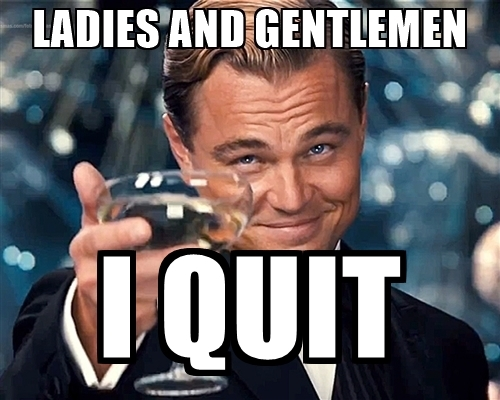